This script gives an example python script for creating a simple stereogram that can be viewed by converging or diverging your eyes. I made it as an attempt to implement the sterogram description found here <https://en.wikipedia.org/wiki/Random_dot_stereogram>.

The script creates two panels filled with identical patterns of random squares. Then a shape is used to select a subset of squares and they are horiozntally shifted to create a disparity between the panels. By focusing ahead or behind the computer screen, this should create a shape that floats in a differnt plane from the rest of the squares. 

First we import numpy for generating a random pattern of squares and matplotlib
functions for plotting them

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import matplotlib.colors as colors
plt.style.use(["seaborn-poster", "seaborn-talk"])

Next we define some parameters to define the plot. These can be changed but edge and N_square should be changed together to make sure the stereogram looks right

In [122]:
# Panel shape and location
panel_sep = 0.2  # gap between panels filled with squares
panel_w = 2.5  # panel width
panel_h = 4  # panel height

# Panel Location
origin = (0.5, 0.5)  # the location we place the lower left
#                      corner of leftmost panel

# Random Square Parameters

edge = 0.1  # the random squares for the
#             sterogram are drawn with this edge length.
#             we need to balance the size of the square
#             and the number of squares we draw to get a good amount
#             of white space in the panels
N_squares = 900  # the number of squares to draw in each panel

# Sterogram Parameters
stero_disp = 0.1  # the horizontal displacement of
#                    the shape to hide in the sterogram

circle_params = {"centre_x": (origin[0] + origin[0]+panel_w) / 2,
                 "centre_y": (origin[1] + origin[1]+panel_h) / 2,
                 "radius": 1
                 }  # define a circle with an x and y center and a radius
#                     this is the shape we'll draw in the stereogram.
#                     it's setup to draw the circle in the middle of the panel

# Define a red and green color to draw a red-green stereogram.
# This is a little easier to get compared with a black and white one
# as it makes it easier to find the focus point to see the stereogram.
# These can be changed to work with other glasses

stereo_green = colors.hex2color('#03fdfb')  # stereo green.
#                                             found this shade works
#                                             decently with a pair of
#                                             red green glasses I had
stereo_red = colors.hex2color('#FF0000')  # stereo red.
#                                         found this shade works
#                                         decently with a pair of
#                                         red green glasses I had


# Define a list of plots to draw,
# *shown options shows the sterographic shape
#  drawn in red,
# *black-white draws a black white sterogram and red-green and green-red
#  draw the panels in red and green for vieiwing with
# *red green glasses. Switching the colours moves the focus point
#  ahead or behind the screen
plots_to_draw = [
                 "black-white",
                 "red-green", "green-red",
     "shown"
                 ]
# Dictionary of Plotting parameters
plots_to_draw_dict = {"shown": {"left_panel_color": "k",
                                "right_panel_color": "k",
                                "left_stereo_shape_color": "r",
                                "right_stereo_shape_color": "r",
                                "title": "Stereogram with Shape Highlighted"
                                },
                      "black-white": {"left_panel_color": "k",
                                      "right_panel_color": "k",
                                      "left_stereo_shape_color": "k",
                                      "right_stereo_shape_color": "k",
                                      "title": "Black-white Stereogram\n" +
                                               " Focus ahead or behind" +
                                               " screen to see sterogram shape"
                                      },
                      "red-green": {"left_panel_color": stereo_red,
                                    "right_panel_color": stereo_green,
                                    "left_stereo_shape_color": stereo_red,
                                    "right_stereo_shape_color": stereo_green,
                                    "title": "Red-Green Stereogram\n" +
                                             " Use r-g glasses to" +
                                             " help with focusing at" +
                                             " correct point"
                                    },
                      "green-red": {"left_panel_color": stereo_green,
                                    "right_panel_color": stereo_red,
                                    "left_stereo_shape_color": stereo_green,
                                    "right_stereo_shape_color": stereo_red,
                                    "title": "Red-Green Stereogram\n" +
                                             " Use r-g glasses to" +
                                             " help with focusing at " +
                                             "correct point"
                                    }
                      }

In [123]:
# Based on the parameters, define the second panel location

panel_disparity = panel_sep + panel_w

second_panel_origin = (origin[0] +
                       panel_disparity,
                       origin[1]
                       )  # xy corrodinates of
#                           the second panel

# Next we define the possible locations for the randot squares.
# The squares are allowed to be on differnt points of a
# grid defined within the first panel and with a x and y spacing equal
# to the square edge length
possible_xs = np.arange(start=origin[0],
                        stop=origin[0] + panel_w,
                        step=edge
                        )
possible_ys = np.arange(start=origin[1],
                        stop=(origin[1] + panel_h),
                        step=edge
                        )
# Select a random subset of the x an y oriign points to draw squares at.
# These are the lower left corner of the squares
np.random.seed(1)
origin_sq_x = np.random.choice(possible_xs, size=N_squares)
np.random.seed(0)
origin_sq_y = np.random.choice(possible_ys, size=N_squares)

# For each one of the plot choices in plots_to_draw, draw a stereogram

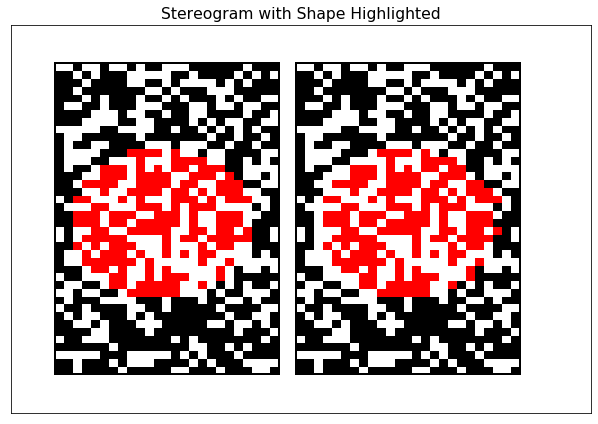

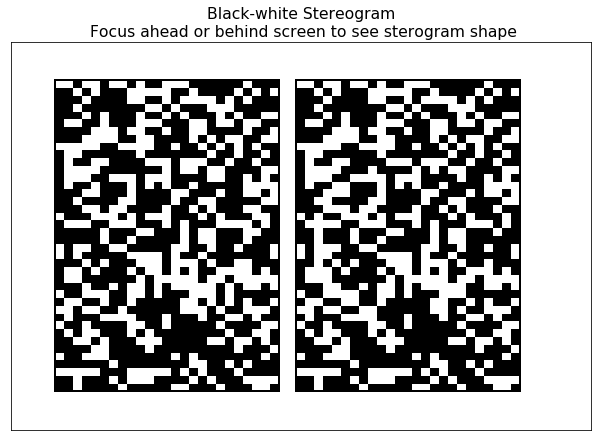

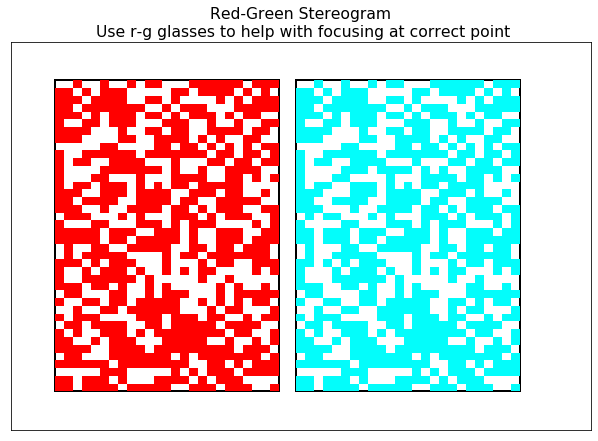

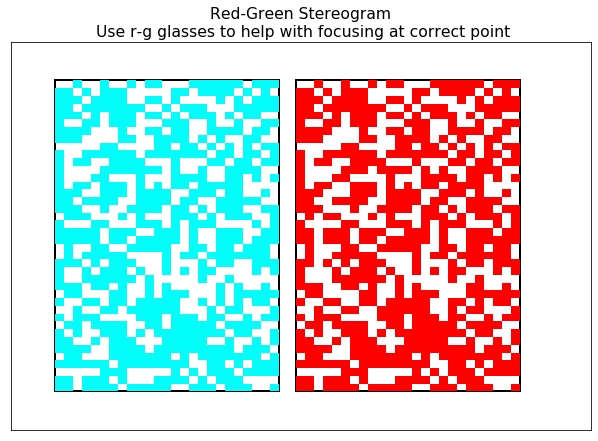

In [124]:
# For loop to plot the stereograms selected in plots_to_draw

for c_param in plots_to_draw:
    f, ax = plt.subplots()  # create a figure and axis
    # Draw in rectangles to serve as panels
    ax.add_patch(Rectangle(xy=origin, width=panel_w,
                           height=panel_h, color="none",
                           ec="k", lw=2
                           )
                 )
    ax.add_patch(Rectangle(xy=second_panel_origin,
                           width=panel_w,
                           height=panel_h, color="none",
                           ec="k", lw=2
                           )
                 )
    # Loop over the squares we're going to draw
    for x, y in zip(origin_sq_x, origin_sq_y):
        # Check if the square's centre falls within
        # the circle defined with the
        # circle_params dictionary
        dist_to_centre = ((x + edge - circle_params["centre_x"])**2 +
                          (y + edge - circle_params["centre_y"])**2
                          )**0.5
        in_stereo_circle = dist_to_centre <= circle_params["radius"]
        # For squares in the circle, move them by the stereo_disp
        # and color them differently if needed
        if in_stereo_circle:
            shift = stero_disp
            cl = plots_to_draw_dict[c_param]["left_stereo_shape_color"]
            cr = plots_to_draw_dict[c_param]["right_stereo_shape_color"]
        # Deal with other squares
        else:
            shift = 0
            cl = plots_to_draw_dict[c_param]["left_panel_color"]
            cr = plots_to_draw_dict[c_param]["right_panel_color"]
        # Draw the squares in each panel
        ax.add_patch(Rectangle(xy=(x, y),
                               width=edge, height=edge,
                               color=cl, ec="k", lw=0
                               )
                     )

        ax.add_patch(Rectangle(xy=(x+panel_disparity+shift, y),
                               width=edge, height=edge,
                               color=cr, ec="k", lw=0
                               )
                     )
    plt.ylim(0, 5)
    plt.xlim(0, 6.5)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.title(plots_to_draw_dict[c_param]["title"])